<a href="https://colab.research.google.com/github/luckysponge1221/Diabetes-Prediction-using-LR-DT-RF/blob/main/projek_siscer_diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv.xls to diabetes.csv.xls


In [ ]:
import pandas as pd
df = pd.read_csv('diabetes.csv.xls')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1




```
cek nilai berapa banyak nilai nol dengan mengkondisikan nilai nol adalah missing value
alasan : nilai nol terlalu banyak maka dianggap anomali
```



In [ ]:
import numpy as np
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols] = df[cols].replace({0 : np.nan})



```
NumOfNaN=jumlah missing value
PctOfNaN= presentasinya missing value
```



In [ ]:
nans =  df.isna().sum().sort_values(ascending = False)
nans_pct = 100*nans/df.shape[0]

missing_values = pd.concat([nans, nans_pct], axis = 1).rename({0 : 'NumOfNaN', 1 : 'PctOfNaN'}, axis = 'columns')
missing_values

,NumOfNaN,PctOfNaN
Insulin,374,48.697917
SkinThickness,227,29.557292
BloodPressure,35,4.557292
BMI,11,1.432292
Glucose,5,0.651042
Pregnancies,0,0.000000
DiabetesPedigreeFunction,0,0.000000
Age,0,0.000000
Outcome,0,0.000000


In [ ]:
#check missing value
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64



```
Handling missing value dengan impute mean
```



In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(df)
dfa=imputer.transform(df)
print(dfa.shape)

(768, 9)


In [ ]:
dfa = pd.DataFrame(dfa, columns = df.columns)
dfa.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.00000,155.548223,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.00000,155.548223,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,29.15342,155.548223,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.00000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.00000,168.000000,43.1,2.288,33.0,1.0




```
cek missing value sudah tertangani
```



In [ ]:
dfa.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64



```
cek outlier
```




Persebaran data sebelum ditangani Outlier: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.435949      12.096346       8.790942   85.021108   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.750000      64.000000      25.000000  121.500000   
50%       3.000000  117.000000      72.202592      29.153420  155.548223   
75%       6.000000  140.250000      80.000000      32.000000  155.548223   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  768.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.875151                  0.331329   11.760232  
min     18.200000                  0.0

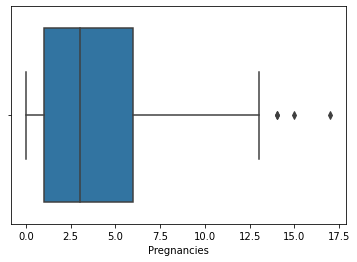

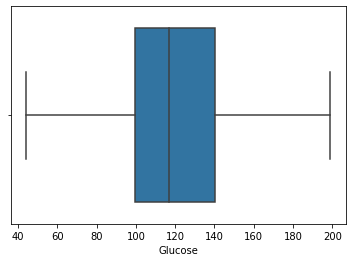

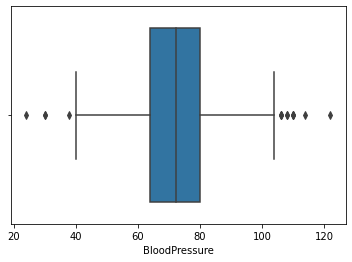

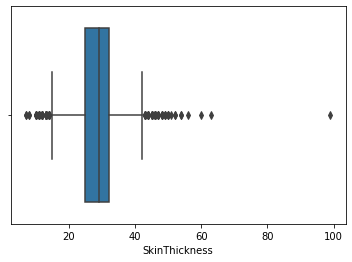

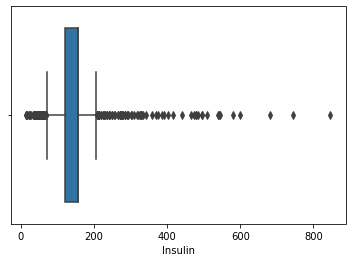

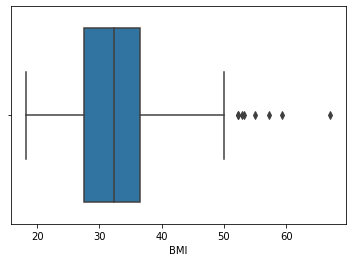

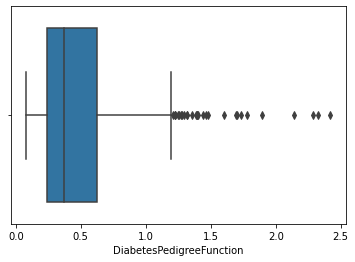

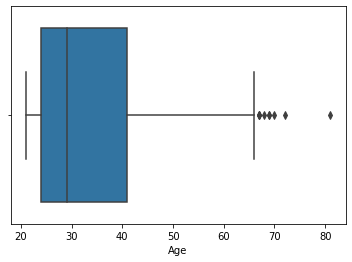

In [ ]:
print('\nPersebaran data sebelum ditangani Outlier: ')
print(dfa[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].describe())
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Masukkan variable
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['Pregnancies'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['Glucose'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['BloodPressure'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['SkinThickness'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['Insulin'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['BMI'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['DiabetesPedigreeFunction'])
plt.show()
plt.figure() # untuk membuat figure baru
sns.boxplot(x=dfa['Age'])
plt.show()



```
Handling Outlier dengan jangankuan interquartil
```



In [ ]:
#handling outlier
# Handling with IQR
Q1 = (dfa[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']]).quantile(0.25)
Q3 = (dfa[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']]).quantile(0.75)
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('Nilai Maximum dari masing-masing Variable adalah: ')
print(maximum)
minimum = Q1 - (1.5*IQR)
print('\nNilai Minimum dari masing-masing Variable adalah: ')
print(minimum)
more_than = (dfa > maximum)
lower_than = (dfa < minimum)
dfa = dfa.mask(more_than, maximum, axis=1)
dfa = dfa.mask(lower_than, minimum, axis=1)
print('\nPersebaran data setelah ditangani Outlier: ')
print(dfa[['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age']].describe())

Nilai Maximum dari masing-masing Variable adalah: 
Pregnancies                  13.500000
Glucose                     201.000000
BloodPressure               104.000000
SkinThickness                42.500000
Insulin                     206.620558
BMI                          50.250000
DiabetesPedigreeFunction      1.200000
Age                          66.500000
dtype: float64

Nilai Minimum dari masing-masing Variable adalah: 
Pregnancies                 -6.500000
Glucose                     39.000000
BloodPressure               40.000000
SkinThickness               14.500000
Insulin                     70.427665
BMI                         13.850000
DiabetesPedigreeFunction    -0.330000
Age                         -1.500000
dtype: float64

Persebaran data setelah ditangani Outlier: 
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.837240  121.686763      72.376538      28.

<ipython-input-14-a51e755831d7>:12: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (dfa > maximum)
<ipython-input-14-a51e755831d7>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (dfa < minimum)




```
cek imbalance data target
```



In [ ]:
dfa['Outcome'].value_counts()

0.0    500
1.0    268
Name: Outcome, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

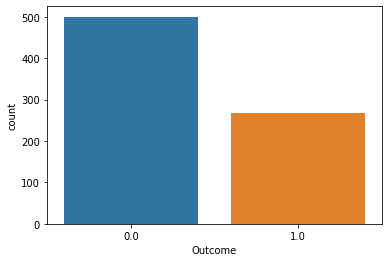

In [ ]:
import seaborn as sns
sns.countplot(x='Outcome',data=dfa)

In [ ]:
# Find correlations with the target and sort
correlations = dfa.corr()['Outcome'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 DiabetesPedigreeFunction    0.184969
Pregnancies                 0.220392
SkinThickness               0.220572
Age                         0.242702
Insulin                     0.266135
BMI                         0.312693
Glucose                     0.492928
Outcome                     1.000000
Name: Outcome, dtype: float64

Most Negative Correlations:
 BloodPressure               0.169333
DiabetesPedigreeFunction    0.184969
Pregnancies                 0.220392
SkinThickness               0.220572
Age                         0.242702
Insulin                     0.266135
BMI                         0.312693
Glucose                     0.492928
Name: Outcome, dtype: float64




```
Handling imbalance dengan resample --> oversampling
```



In [ ]:
#handling imbalance
from sklearn.utils import resample

df_outcome = dfa['Outcome']
df_majority = dfa[(df_outcome == 0)]
df_minority = dfa[(df_outcome == 1)]

#df_majority_undersampled = resample(df_majority,
 #                                   replace = True,
  #                                  n_samples = 268,
   #                                 random_state = 1)
#df_resampled = pd.concat([df_majority_undersampled, df_minority])
# upsample minority class
df_minority_upsampled = resample(df_minority,
                                replace = True,
                                n_samples = 500,
                                random_state = 1)
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

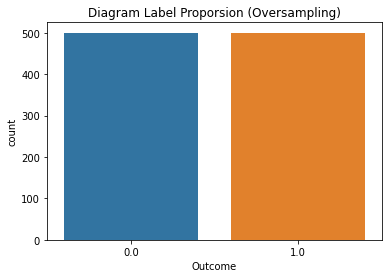

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(x='Outcome', data=df_upsampled)
plt.title('Diagram Label Proporsion (Oversampling)')
plt.show()

In [ ]:
df_upsampled.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
100,1.0,163.0,72.0,29.15342,155.548223,39.0,1.200,33.0,1.0
683,4.0,125.0,80.0,29.15342,155.548223,32.3,0.536,27.0,1.0
197,3.0,107.0,62.0,14.50000,70.427665,22.9,0.678,23.0,1.0
740,11.0,120.0,80.0,37.00000,150.000000,42.3,0.785,48.0,1.0
588,3.0,176.0,86.0,27.00000,156.000000,33.3,1.154,52.0,1.0


In [ ]:
# defining feature matrix and response vector (after resampling)
X = df_upsampled.loc[:, df_upsampled.columns != 'Outcome']
y = df_upsampled['Outcome']

In [ ]:
# splitting X and y into training and testing sets (pake proporsi 70 30)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 8) (300, 8) (700,) (300,)


Modeling



```
Logistic Regression
```



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', max_iter = 2000)
lr = lr.fit(X_train, y_train)
print('Model Logistic Regression: \n', lr)

Model Logistic Regression: 
 LogisticRegression(max_iter=2000)


In [ ]:
#evaluate pilihan agak simple outputnya
from sklearn.metrics import accuracy_score
y_pred = lr.predict(X_test)
y_lr_proba= lr.predict_proba(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7466666666666667


In [ ]:
# predict
from sklearn.metrics import confusion_matrix, classification_report
y_test_pred = lr.predict(X_test)
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_test, y_test_pred))
print(confusion_matrix(y_test, y_pred))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75       151
         1.0       0.76      0.72      0.74       149

    accuracy                           0.75       300
   macro avg       0.75      0.75      0.75       300
weighted avg       0.75      0.75      0.75       300

[[116  35]
 [ 41 108]]


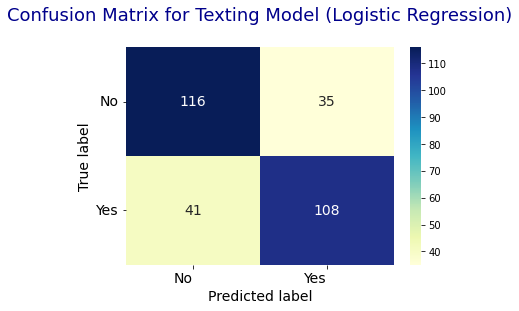

In [ ]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Texting Model (Logistic Regression)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()



```
Decision Tree
```



In [ ]:
# using decision tree
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt = dt.fit(X_train, y_train)
y_dt_test = dt.predict(X_test)
y_dt_proba= dt.predict_proba(X_test)

In [ ]:
print(classification_report(y_test, y_dt_test))
print(confusion_matrix(y_test, y_dt_test))

              precision    recall  f1-score   support

         0.0       0.86      0.76      0.81       151
         1.0       0.78      0.87      0.83       149

    accuracy                           0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300

[[115  36]
 [ 19 130]]


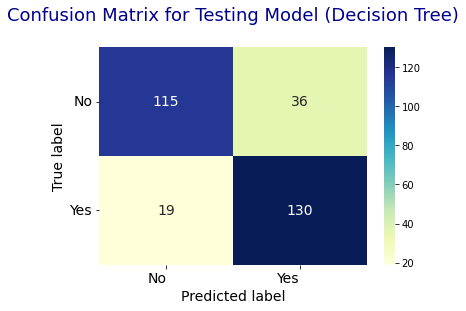

In [ ]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_dt_test)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Decision Tree)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()



```
Random Forest
```



In [ ]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state= 42,
                            max_depth=20,
                            n_estimators = 100,
                            oob_score = True)
rf = rf.fit(X_train, y_train)
y_rf_test = rf.predict(X_test)
y_rf_proba= rf.predict_proba(X_test)
print(rf)

RandomForestClassifier(max_depth=20, oob_score=True, random_state=42)


In [ ]:
print(classification_report(y_test, y_rf_test))
print(confusion_matrix(y_test, y_rf_test))

              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85       151
         1.0       0.82      0.91      0.86       149

    accuracy                           0.85       300
   macro avg       0.86      0.85      0.85       300
weighted avg       0.86      0.85      0.85       300

[[121  30]
 [ 14 135]]


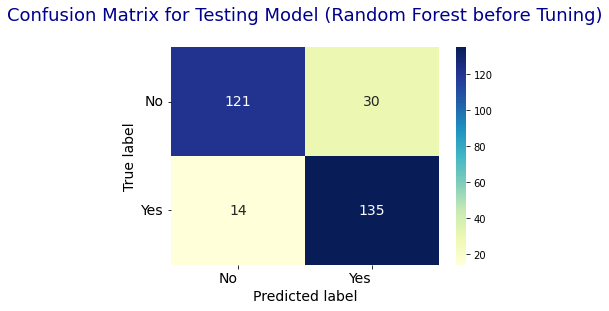

In [ ]:
confusion_matrix_app = pd.DataFrame((confusion_matrix(y_test, y_rf_test)), ('No', 'Yes'), ('No', 'Yes'))

# plot confusion matrix
plt.figure()
heatmap = sns.heatmap(confusion_matrix_app, annot=True, annot_kws={'size':14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Confusion Matrix for Testing Model (Random Forest before Tuning)\n', fontsize=18, color='darkblue')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize = 14)
plt.show()



```
roc curve
```



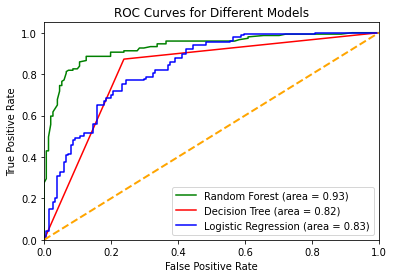

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Get predicted probabilities for each model
y_rf_proba = rf.predict_proba(X_test)[:, 1]
y_dt_proba = dt.predict_proba(X_test)[:, 1]
y_lr_proba = lr.predict_proba(X_test)[:, 1]

# Compute the ROC curve and AUC score for each model
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf_proba)
roc_auc_rf = roc_auc_score(y_test, y_rf_proba)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt_proba)
roc_auc_dt = roc_auc_score(y_test, y_dt_proba)

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_lr_proba)
roc_auc_lr = roc_auc_score(y_test, y_lr_proba)


# Plot the ROC curves
plt.plot(fpr_rf, tpr_rf, color='green', label='Random Forest (area = %0.2f)' % roc_auc_rf)
plt.plot(fpr_dt, tpr_dt, color='red', label='Decision Tree (area = %0.2f)' % roc_auc_dt)
plt.plot(fpr_lr, tpr_lr, color='blue', label='Logistic Regression (area = %0.2f)' % roc_auc_lr)
plt.plot([0, 1], [0, 1], color='orange', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()
